In [106]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [81]:
#create file variable for data set
file = "new_data_2.csv"
#read in csv file
df = pd.read_csv(file)
#show a snip of the data
df.head()

,Unnamed: 0,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


In [82]:
#remove unnamed 0 column
df.drop(columns=df.columns[0], axis=1, inplace = True)
df.head()

,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


In [83]:
#see the data types by column
df.dtypes

name                    object
popularity               int64
duration_in_seconds    float64
explicit                 int64
artists                 object
release_date            object
danceability           float64
energy                 float64
loudness               float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
month                   object
year                     int64
quarter                 object
dtype: object

In [84]:
#groupby year and aggregate means of our chosen metrics
grouped_avg = df.groupby("year").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
grouped_avg

,danceability,energy,speechiness,acousticness,valence,explicit
year,,,,,,
2015,0.598816,0.650896,0.084369,0.293570,0.508292,0.102785
2016,0.607457,0.658413,0.093959,0.282334,0.495939,0.125638
2017,0.625758,0.659662,0.100114,0.278274,0.493427,0.172290
2018,0.635623,0.653849,0.105013,0.276002,0.482426,0.190201
2019,0.650893,0.636790,0.110389,0.293986,0.493060,0.216755
2020,0.658587,0.639914,0.111564,0.271072,0.501836,0.219853
2021,0.668219,0.608707,0.126650,0.288460,0.495748,0.275410


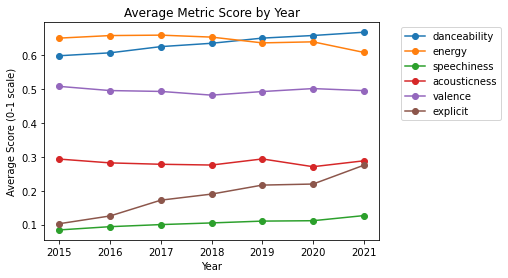

In [85]:
# plot mean metrics by year on a line chart
plt.plot(grouped_avg,marker ="o")
plt.xlabel("Year")
plt.ylabel("Average Score (0-1 scale)")
plt.title("Average Metric Score by Year")
plt.legend(["danceability", "energy", "speechiness", "acousticness", "valence", "explicit"],bbox_to_anchor=(1.05, 1), loc='upper left')

<AxesSubplot:xlabel='year'>

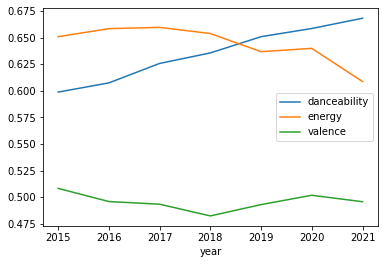

In [86]:
#danceability increasing, energy decreasing, explicit increasing. 3 factors to dig into more

#split into two graphs, top 3 and bottom 3 to better see scale
discrete_g1 = df.groupby("year").agg({"danceability":"mean", "energy":"mean", "valence":"mean"})
discrete_g1.plot()

<AxesSubplot:xlabel='year'>

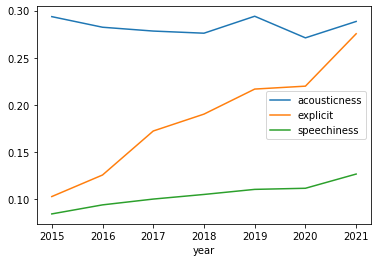

In [87]:
# split into two graphs to better see scale
discrete_g2 = df.groupby("year").agg({"acousticness":"mean", "explicit":"mean", "speechiness":"mean"})
discrete_g2.plot()

In [88]:
# create a timeperiod column that shows pre covid and covid time period
# pre covid = 1/1/15 thru 12/31/19
# covid = 1/1/20 thru 4/30/21
conditions = [df["year"] <=2019, df["year"] >= 2020]
values = ["pre-covid", "covid"]
df["time_period"] = np.select(conditions, values)
df.head()

,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter,time_period
0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1,covid
1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2,pre-covid
2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2,pre-covid
3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4,covid
4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4,covid


<AxesSubplot:xlabel='time_period'>

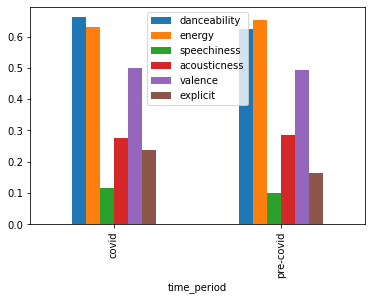

In [89]:
#group by time period and aggregate means of selected metrics
tp_group = df.groupby("time_period").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
#plot a bar chart
tp_group.plot(kind="bar")

In [90]:
#null hypothesis - danceability scores of songs released did not increase by a statistically\
# significant margin during the covid period (defined as 1/1/20 - 4/30/21)\
# as compared to the control period (1/1/15 - 12/31/19) 

#alt hypothesis - danceability scores of songs released increased by a statistically \
# significant margin during the covid period (defined as 1/1/20 - 4/30/21) as compared\
# to the control period (1/1/15 - 12/31/19)

In [91]:
# two sample t test
#create t test population 1
population1 = df[df["time_period"] == "pre-covid"]
population1.danceability.mean()

0.6244051452500314

In [92]:
#create t test population 2
population2 = df[df["time_period"] == "covid"]
population2.danceability.mean()

0.6614205373195655

In [93]:
#run t test
stats.ttest_ind(population1.danceability, population2.danceability, equal_var=False)

Ttest_indResult(statistic=-28.064263796708662, pvalue=2.052586935813239e-171)

In [94]:
#result indicates that we can reject the null hypothesis, and danceability is statistically different between the time periods

In [100]:
# further statistical analysis with MANOVA
# does the time_period have a significant contribution to our dependent variables (music metrics)
maov = MANOVA.from_formula('danceability + energy + speechiness + acousticness + valence + explicit ~ time_period', data=df)

In [101]:
print(maov.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF     F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda  0.0784 6.0000 72713.0000 142420.5361 0.0000
         Pillai's trace  0.9216 6.0000 72713.0000 142420.5361 0.0000
 Hotelling-Lawley trace 11.7520 6.0000 72713.0000 142420.5361 0.0000
    Roy's greatest root 11.7520 6.0000 72713.0000 142420.5361 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
          time_period       Value  Num DF   Den DF   F Value  Pr > F
--------------------------------------------------------------------
              Wilks' lambda 0.9800 6.0000 72713.0000 246

In [ ]:
# time_period does significantly contribute to the dependent music metrics for songs released as demonstrated by the p val < .05\
# however, the Wilks' lamda score (ranging 0-1) is very far from zero.\
# meaning, the time_period does significantly contribute to the metrics, but not overwhelmingly so (e.g. 1- wilks' lamba of .98 = .02 explained by time_period)

In [102]:
# do a aov to ensure no type 1 error
# relative threshold = confidence level/# dependents
rel_threshold = .05/6
rel_threshold

0.008333333333333333

In [107]:
#check danceability
reg1 = ols('danceability~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg1, type=2)
print(aov)

                  df       sum_sq    mean_sq           F         PR(>F)
time_period      1.0    19.532325  19.532325  771.595112  6.207317e-169
Residual     72718.0  1840.799141   0.025314         NaN            NaN


In [ ]:
#danceability is below relative threshold, therefore there is a significant difference in danceability between timeperiods

In [109]:
#check energy
reg2 = ols('energy~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg2, type=2)
print(aov)

                  df       sum_sq   mean_sq           F        PR(>F)
time_period      1.0     6.153001  6.153001  138.413284  6.326821e-32
Residual     72718.0  3232.593592  0.044454         NaN           NaN


In [ ]:
#energy is below relative threshold, therefore there is a significant difference in energy between timeperiods

In [110]:
#check speechiness
reg3 = ols('speechiness~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg3, type=2)
print(aov)

                  df      sum_sq   mean_sq           F        PR(>F)
time_period      1.0    4.074887  4.074887  396.908672  4.460944e-88
Residual     72718.0  746.563687  0.010267         NaN           NaN


In [ ]:
#speechiness is below relative threshold, therefore there is a significant difference in speechiness between timeperiods

In [111]:
#check acousticness
reg4 = ols('acousticness~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg4, type=2)
print(aov)

                  df       sum_sq   mean_sq          F  PR(>F)
time_period      1.0     1.118379  1.118379  13.836066  0.0002
Residual     72718.0  5877.846411  0.080831        NaN     NaN


In [ ]:
#acousticness is below relative threshold, therefore there is a significant difference in acousticness between timeperiods\
# but not as much as the other factors so far based on p val

In [112]:
#check valence
reg5 = ols('valence~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg5, type=2)
print(aov)

                  df       sum_sq   mean_sq         F    PR(>F)
time_period      1.0     0.438656  0.438656  7.435849  0.006395
Residual     72718.0  4289.786315  0.058992       NaN       NaN


In [ ]:
#valence is below relative threshold, therefore there is a significant difference in valence between timeperiods\
# but not as much as the other factors so far based on p val

In [113]:
#check explicit
reg6 = ols('explicit~time_period', data=df).fit()
aov = sm.stats.anova_lm(reg6, type=2)
print(aov)

                  df        sum_sq    mean_sq           F         PR(>F)
time_period      1.0     76.579728  76.579728  516.876285  5.066406e-114
Residual     72718.0  10773.805736   0.148159         NaN            NaN


In [ ]:
#explicit is below relative threshold, therefore there is a significant difference in explicit between timeperiods

In [ ]:
# based on the above, time_period seems to impact danceability the most and there is a significant difference in\
# danceability scores released in covid era vs. pre-covid era